In [ ]:
import requests
import json
from config import y_api_key as api_key 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook 

In [ ]:
#found in https://python.gotrained.com/yelp-fusion-api-tutorial/
headers = {'Authorization': 'Bearer %s' % api_key}


#pull in zipcode list
zipcode_df=pd.read_csv("zipcode.csv")
#turn zipcode into a list
zipcodes=zipcode_df['Zip Code'].tolist()


#category of business you want to pull 1. nightlife
categories = 'nightlife' 
#base url
url='https://api.yelp.com/v3/businesses/search'
#create a list for the number of returned categories in zipcode
category_l = []
#for every zipcode in the list return all businesses for the category searched and get rid of entries not within the zip and add to a total list
for zipcode in zipcodes:
    print(f'starting datapull for {zipcode}')
    #create a list for all the pages returned
    yelp_data = []
    #the max returned businesses is 1000 and you can have 50 on a page so create a for loop to iterate through until get 400 code
    #https://stackoverflow.com/questions/35525994/how-to-request-more-than-20-results-from-yelp-api
    for offset in range(0, 1000, 50):
        params = {
            'limit': 50, 
            'location': zipcode,
            'categories': categories,
            'offset': offset
        }

        response = requests.get(url, headers=headers, params=params)
        if response.status_code == 200:
            #combine page with previous pages
            yelp_data += response.json()['businesses']
        elif response.status_code == 400:
            print('400 Bad Request')
            break
    print(f'finished datapull for {zipcode}')
    #create a blank zipcode list in preparation of pulling in zipcodes for each entry collected in the above yelp_data
    zipcode_b =[]
    #for each business in the yelp_data json, find the zip code and then append it to the zipcode_b list
    for business in range(0,len(yelp_data)):
        currentzip =str(yelp_data[business]["location"]["zip_code"])
        if currentzip == str(zipcode):
            zipcode_b.append(currentzip)
            #print(currentzip)
       # else:
        #    print(f'Not correct zip :{currentzip} != {zipcode}')
    #add to the category list with total number of categories from current zipcode you are looking at
    numberinzip=len(zipcode_b)
    category_l.append(numberinzip)
    print(f'new appended category total: {numberinzip}  for {zipcode}')

In [ ]:
#category of business you want to pull 2. restaurants
categories = 'restaurants' 
#base url
url='https://api.yelp.com/v3/businesses/search'
#create a list for the number of returned categories in zipcode
category_r = []
#for every zipcode in the list return all businesses for the category searched and get rid of entries not within the zip and add to a total list
for zipcode in zipcodes:
    print(f'starting datapull for {zipcode}')
    #create a list for all the pages returned
    yelp_data = []
    #the max returned businesses is 1000 and you can have 50 on a page so create a for loop to iterate through until get 400 code
    #https://stackoverflow.com/questions/35525994/how-to-request-more-than-20-results-from-yelp-api
    for offset in range(0, 1000, 50):
        params = {
            'limit': 50, 
            'location': zipcode,
            'categories': categories,
            'offset': offset
        }

        response = requests.get(url, headers=headers, params=params)
        if response.status_code == 200:
            #combine page with previous pages
            yelp_data += response.json()['businesses']
        elif response.status_code == 400:
            print('400 Bad Request')
            break
    print(f'finished datapull for {zipcode}')
    #create a blank zipcode list in preparation of pulling in zipcodes for each entry collected in the above yelp_data
    zipcode_b =[]
    #for each business in the yelp_data json, find the zip code and then append it to the zipcode_b list
    for business in range(0,len(yelp_data)):
        currentzip =str(yelp_data[business]["location"]["zip_code"])
        if currentzip == str(zipcode):
            zipcode_b.append(currentzip)
            #print(currentzip)
       # else:
        #    print(f'Not correct zip :{currentzip} != {zipcode}')
    #add to the category list with total number of categories from current zipcode you are looking at
    numberinzip=len(zipcode_b)
    category_r.append(numberinzip)
    print(f'new appended category total: {numberinzip}  for {zipcode}')

In [ ]:
#category of business you want to pull 3. grocery
categories = 'grocery' 
#base url
url='https://api.yelp.com/v3/businesses/search'
#create a list for the number of returned categories in zipcode
category_g = []
#for every zipcode in the list return all businesses for the category searched and get rid of entries not within the zip and add to a total list
for zipcode in zipcodes:
    print(f'starting datapull for {zipcode}')
    #create a list for all the pages returned
    yelp_data = []
    #the max returned businesses is 1000 and you can have 50 on a page so create a for loop to iterate through until get 400 code
    #https://stackoverflow.com/questions/35525994/how-to-request-more-than-20-results-from-yelp-api
    for offset in range(0, 1000, 50):
        params = {
            'limit': 50, 
            'location': zipcode,
            'categories': categories,
            'offset': offset
        }

        response = requests.get(url, headers=headers, params=params)
        if response.status_code == 200:
            #combine page with previous pages
            yelp_data += response.json()['businesses']
        elif response.status_code == 400:
            print('400 Bad Request')
            break
    print(f'finished datapull for {zipcode}')
    #create a blank zipcode list in preparation of pulling in zipcodes for each entry collected in the above yelp_data
    zipcode_b =[]
    #for each business in the yelp_data json, find the zip code and then append it to the zipcode_b list
    for business in range(0,len(yelp_data)):
        currentzip =str(yelp_data[business]["location"]["zip_code"])
        if currentzip == str(zipcode):
            zipcode_b.append(currentzip)
            #print(currentzip)
       # else:
        #    print(f'Not correct zip :{currentzip} != {zipcode}')
    #add to the category list with total number of categories from current zipcode you are looking at
    numberinzip=len(zipcode_b)
    category_g.append(numberinzip)
    print(f'new appended category total: {numberinzip}  for {zipcode}')

In [ ]:
yelp_df=pd.DataFrame({"ZipCode":zipcodes, "Total Nightlife": category_l, "Total Restaurant": category_r})
yelp_df.to_csv("yelp_nightlife_restaurant.csv", encoding="utf-8", index=False)

In [ ]:
yelp_g_df=pd.DataFrame({"ZipCode": zipcodes, "Total Grocery": category_g})
yelp_g_df.to_csv("yelp_grocery.csv", encoding="utf-8", index=False)

In [1]:
#import csvs as DataFrames so do not have to re-run yelp api 
import pandas as pd
import matplotlib.pyplot as plt
import os
# %matplotlib notebook
yelp_df = pd.read_csv('yelp_nightlife_restaurant.csv')
yelp_g_df = pd.read_csv('yelp_grocery.csv')

#merge all yelp data
yelp_complete = pd.merge(yelp_df, yelp_g_df, how='inner', on='ZipCode' )
yelp_complete.head()

,ZipCode,Total Nightlife,Total Restaurant,Total Grocery
0,60601,47,149,7
1,60602,11,78,0
2,60603,22,97,1
3,60604,5,41,0
4,60605,34,113,7


In [2]:
yelp_complete = yelp_complete.rename(columns={'ZipCode':'Zipcode'})
yelp_complete.head()

,Zipcode,Total Nightlife,Total Restaurant,Total Grocery
0,60601,47,149,7
1,60602,11,78,0
2,60603,22,97,1
3,60604,5,41,0
4,60605,34,113,7


In [3]:
housing_df=pd.read_csv("housing_data.csv")
housing_df.head()

,Zipcode,Median Rent,Median Home Value
0,60601,1944.0,391100.0
1,60602,1666.0,NaN
2,60603,1630.0,NaN
3,60604,1835.0,NaN
4,60605,1865.0,284100.0


In [4]:
yelp_housing_df = pd.merge(yelp_complete, housing_df, how='inner', on='Zipcode')


In [5]:
file_path = os.path.join('Census_Data', 'chicago_census_data.csv')
chicago_df=pd.read_csv(file_path)
chicago_df.head()
chicago_df = chicago_df[['Zipcode','Population']]
chicago_df.head()

,Zipcode,Population
0,60601,13887
1,60602,1277
2,60603,1197
3,60604,668
4,60605,26188


In [6]:
yelp_housing = pd.merge(chicago_df, yelp_housing_df, how='inner', on='Zipcode')

In [7]:
yelp_housing.head()

,Zipcode,Population,Total Nightlife,Total Restaurant,Total Grocery,Median Rent,Median Home Value
0,60601,13887,47,149,7,1944.0,391100.0
1,60602,1277,11,78,0,1666.0,NaN
2,60603,1197,22,97,1,1630.0,NaN
3,60604,668,5,41,0,1835.0,NaN
4,60605,26188,34,113,7,1865.0,284100.0


In [8]:
yelp_housing['Nightlife per Capita'] = yelp_housing['Total Nightlife']/ yelp_housing['Population']
yelp_housing['Restaurants per Capita'] = yelp_housing['Total Restaurant']/ yelp_housing['Population']
yelp_housing['Grocery per Capita'] = yelp_housing['Total Grocery']/ yelp_housing['Population']

yelp_housing.head()

,Zipcode,Population,Total Nightlife,Total Restaurant,Total Grocery,Median Rent,Median Home Value,Nightlife per Capita,Restaurants per Capita,Grocery per Capita
0,60601,13887,47,149,7,1944.0,391100.0,0.003384,0.010729,0.000504
1,60602,1277,11,78,0,1666.0,NaN,0.008614,0.061081,0.000000
2,60603,1197,22,97,1,1630.0,NaN,0.018379,0.081036,0.000835
3,60604,668,5,41,0,1835.0,NaN,0.007485,0.061377,0.000000
4,60605,26188,34,113,7,1865.0,284100.0,0.001298,0.004315,0.000267


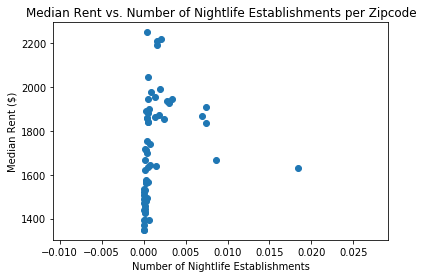

<Figure size 432x288 with 0 Axes>

In [11]:
x = yelp_housing['Nightlife per Capita']
y = yelp_housing['Median Rent']

plt.scatter(x, y,)
plt.xlabel('Number of Nightlife Establishments')
plt.ylabel('Median Rent ($)')
plt.title('Median Rent vs. Number of Nightlife Establishments per Zipcode')
plt.show()
plt.savefig('Median Rent vs Nightlife')

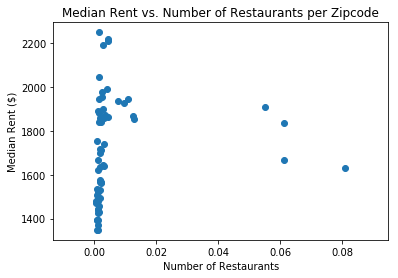

<Figure size 432x288 with 0 Axes>

In [12]:
x = yelp_housing['Restaurants per Capita']
y = yelp_housing['Median Rent']

plt.scatter(x, y,)
plt.xlabel('Number of Restaurants')
plt.ylabel('Median Rent ($)')
plt.title('Median Rent vs. Number of Restaurants per Zipcode')
plt.show()
plt.savefig('Median Rent vs Restaurants')

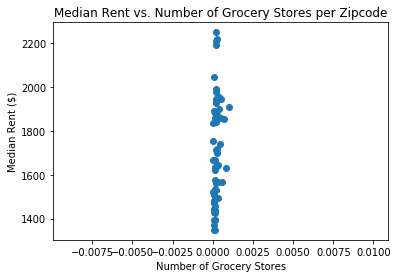

<Figure size 432x288 with 0 Axes>

In [13]:
x = yelp_housing['Grocery per Capita']
y = yelp_housing['Median Rent']

plt.scatter(x, y,)
plt.xlabel('Number of Grocery Stores')
plt.ylabel('Median Rent ($)')
plt.title('Median Rent vs. Number of Grocery Stores per Zipcode')
plt.show()
plt.savefig('Median Rent vs Grocery Stores')